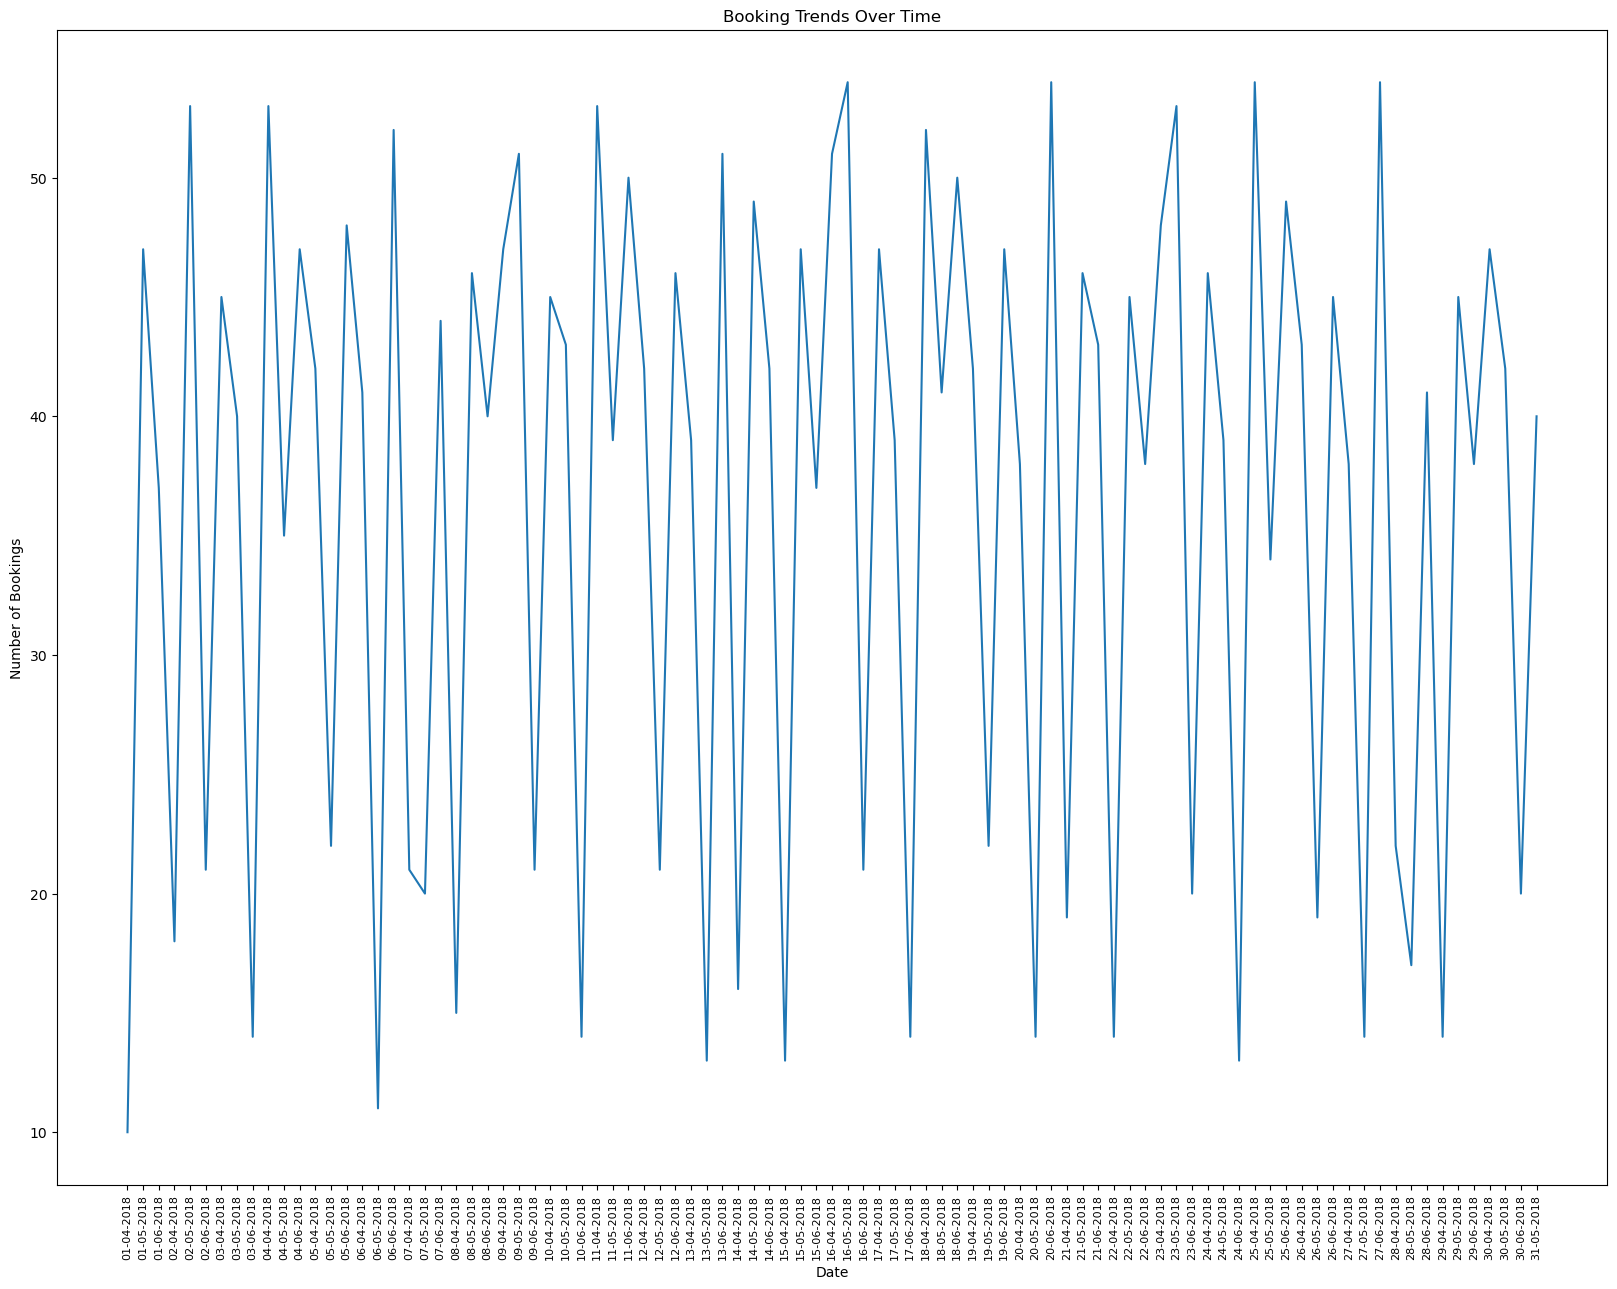

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
merged_df = pd.read_csv("C:/Users/gulat/Documents/Cult internship/Cleaned_datasets/Csv data/Cleaned.csv")


# Group by date and count bookings
bookings_in_a_day = merged_df['BookingEndDateTime (Day/Month/Year)'].value_counts().sort_index().reset_index()
bookings_in_a_day.columns = ['BookingEndDateTime (Day/Month/Year)', 'No. of bookings']

# Plot the data
plt.figure(figsize=(20,15))
sns.lineplot(x='BookingEndDateTime (Day/Month/Year)', y='No. of bookings', data=bookings_in_a_day)
plt.title('Booking Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90, fontsize=8)
plt.show()



In [7]:
print(merged_df.head())


  ActivitySiteID Class Name  Class Timings  \
0            HXP  20-20-20   2.45pm-3.45pm   
1            HXP  20-20-20   2.45pm-3.45pm   
2            HXP  20-20-20   2.45pm-3.45pm   
3            HXP  20-20-20   2.45pm-3.45pm   
4            HXP  20-20-20   2.45pm-3.45pm   

  BookingEndDateTime (Day/Month/Year) BookingStartTime  MaxBookees  \
0                          08-04-2018          2:45 PM          25   
1                          15-04-2018          2:45 PM          25   
2                          22-04-2018          2:45 PM          25   
3                          29-04-2018          2:45 PM          25   
4                          06-05-2018          2:45 PM          25   

   Number Booked  Price (INR)  
0             12          499  
1             15          499  
2             14          499  
3              9          499  
4              7          499  


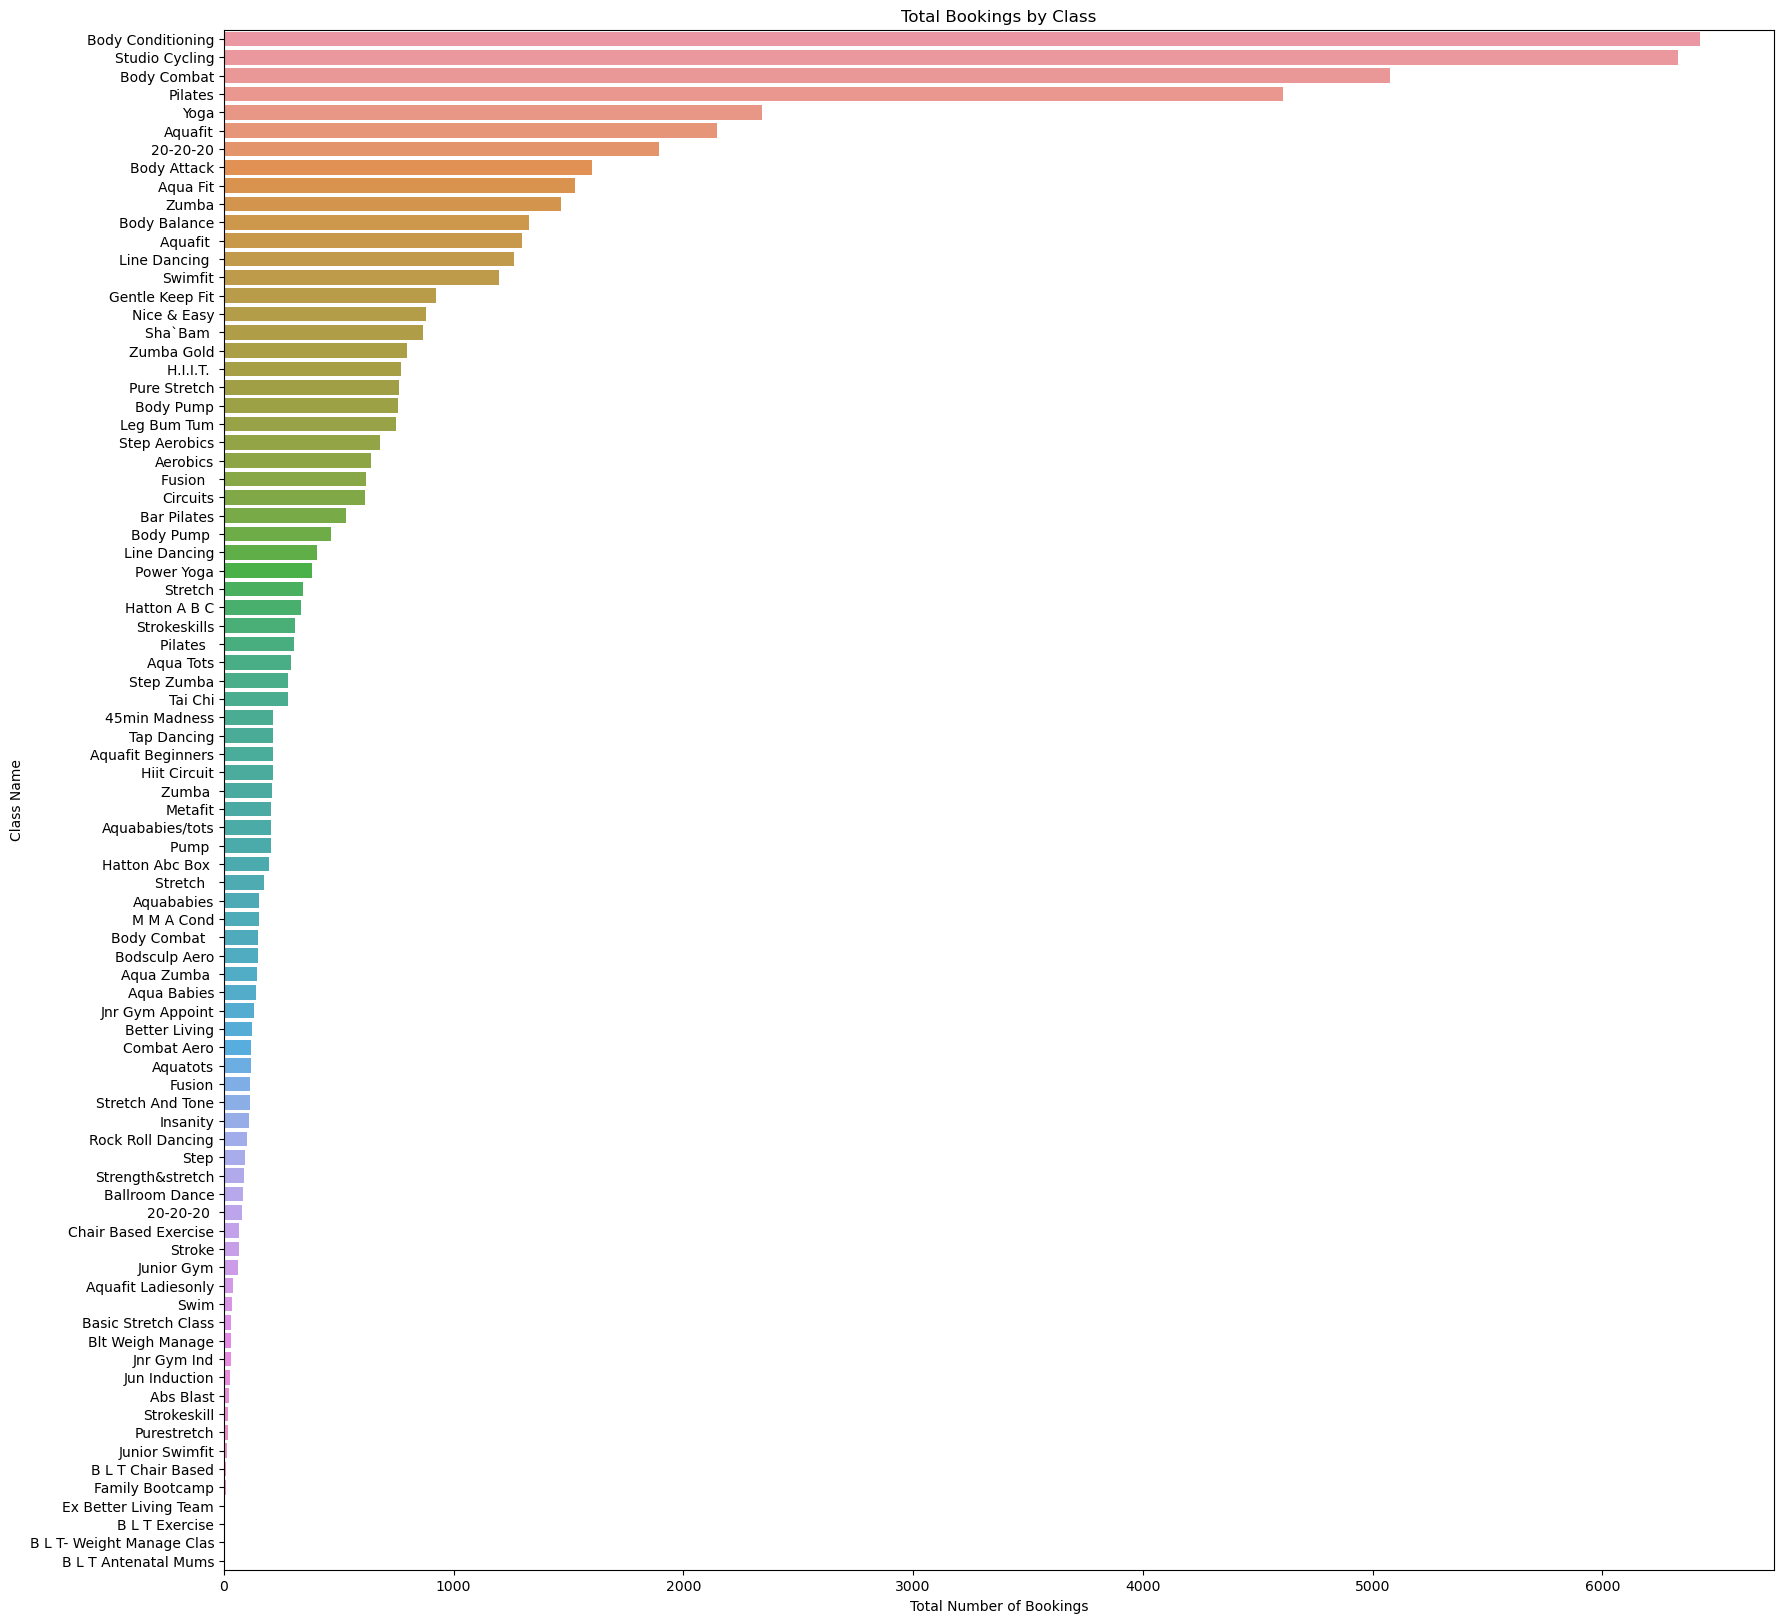

In [8]:
# Aggregate the total number of bookings per class
bookings_per_class = merged_df.groupby('Class Name')['Number Booked'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(20, 20))
sns.barplot(x='Number Booked', y='Class Name', data=bookings_per_class.sort_values(by='Number Booked', ascending=False))
plt.title('Total Bookings by Class')
plt.xlabel('Total Number of Bookings')
plt.ylabel('Class Name')
plt.show()


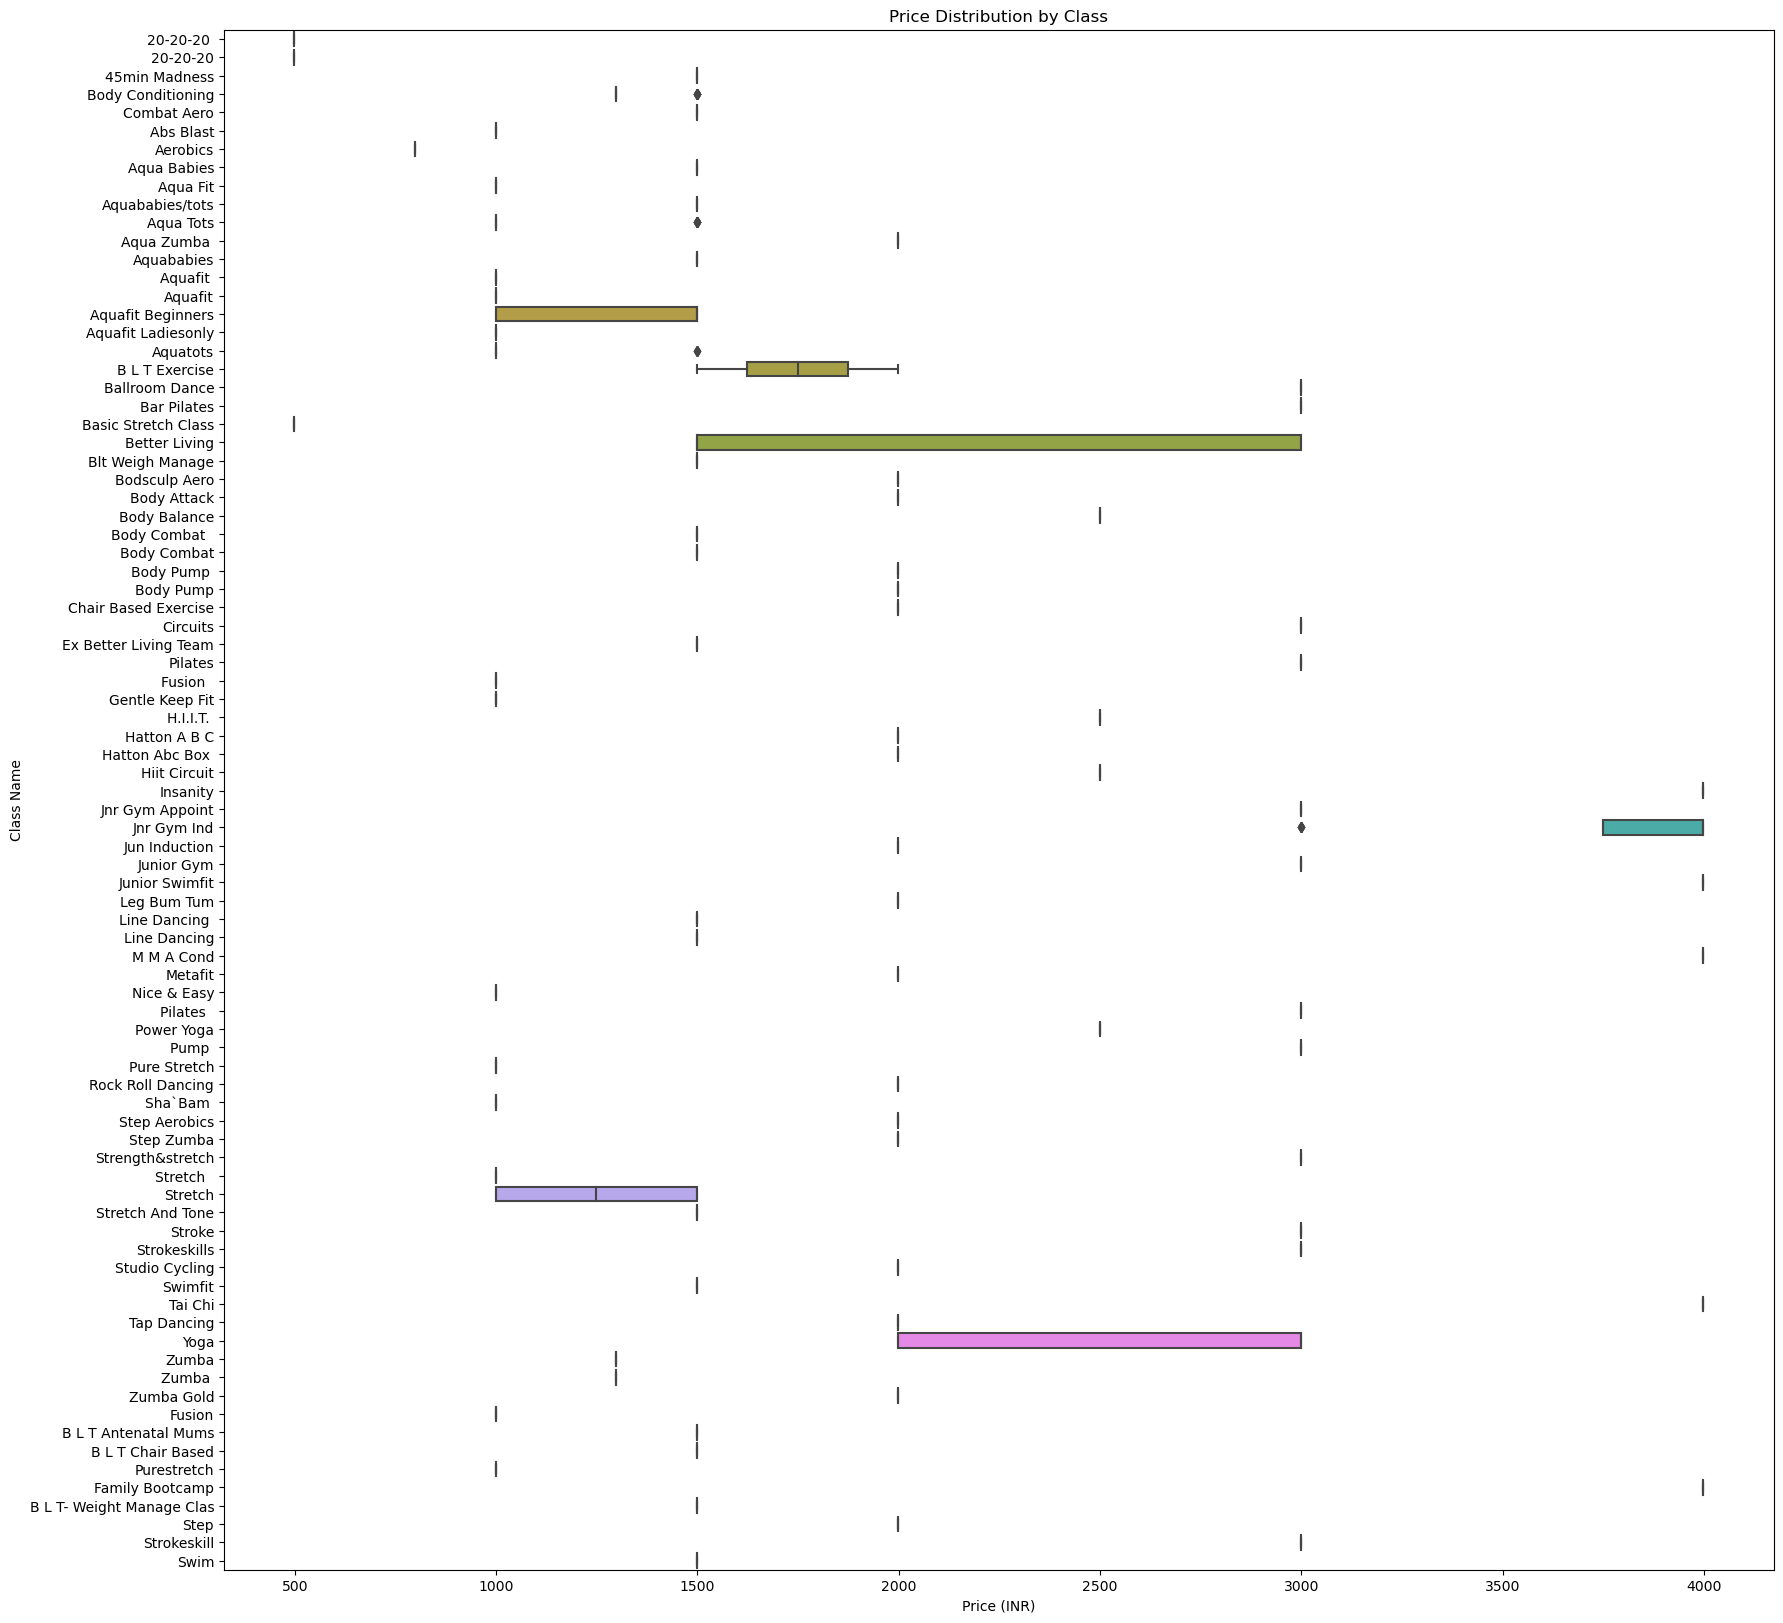

In [9]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Price (INR)', y='Class Name', data=merged_df)
plt.title('Price Distribution by Class')
plt.xlabel('Price (INR)')
plt.ylabel('Class Name')
plt.show()

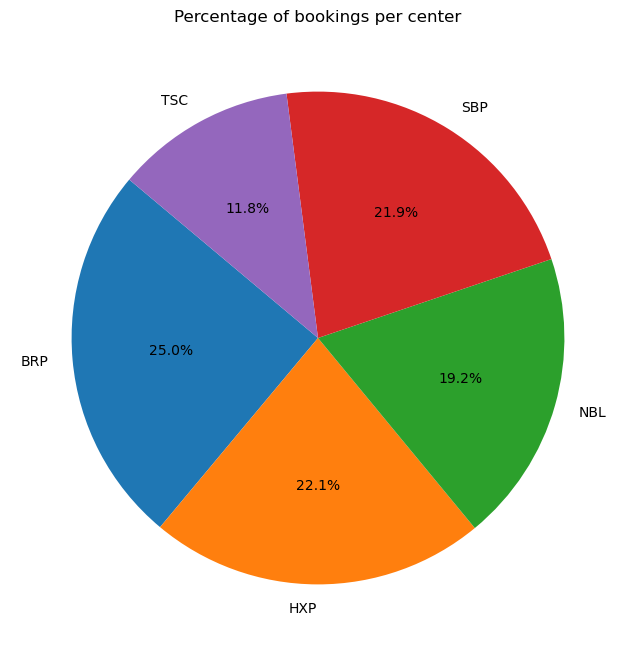

In [10]:
bookings_per_center = merged_df.groupby('ActivitySiteID')['Number Booked'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bookings_per_center['Number Booked'], labels=bookings_per_center['ActivitySiteID'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of bookings per center')
plt.show()

In [11]:
#descriptive statistics
print(merged_df.describe())

        MaxBookees  Number Booked  Price (INR)
count  3287.000000    3287.000000  3287.000000
mean     32.180712      17.093398  1850.688470
std      15.096652       9.502832   791.127021
min       2.000000       1.000000   499.000000
25%      24.000000      10.000000  1299.000000
50%      30.000000      16.000000  1499.000000
75%      35.000000      24.000000  2499.000000
max      70.000000      64.000000  3999.000000


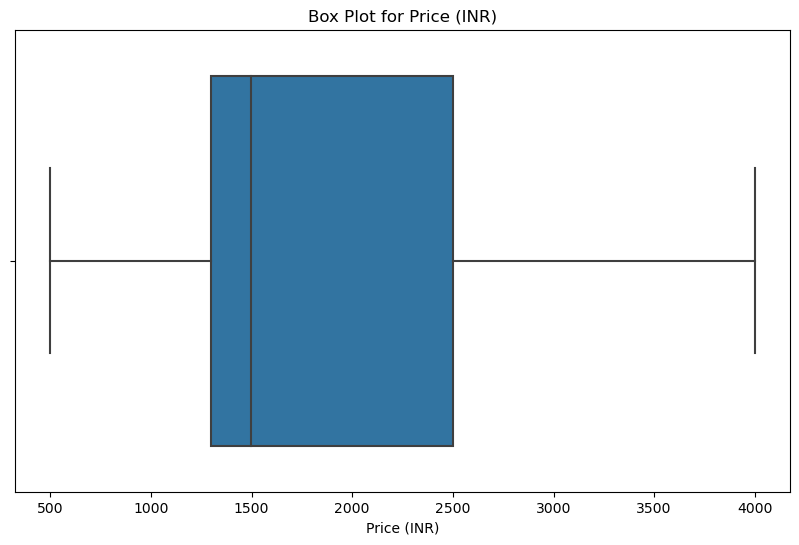

In [12]:
#Outliers identification
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price (INR)', data=merged_df)
plt.title('Box Plot for Price (INR)')
plt.xlabel('Price (INR)')
plt.show()

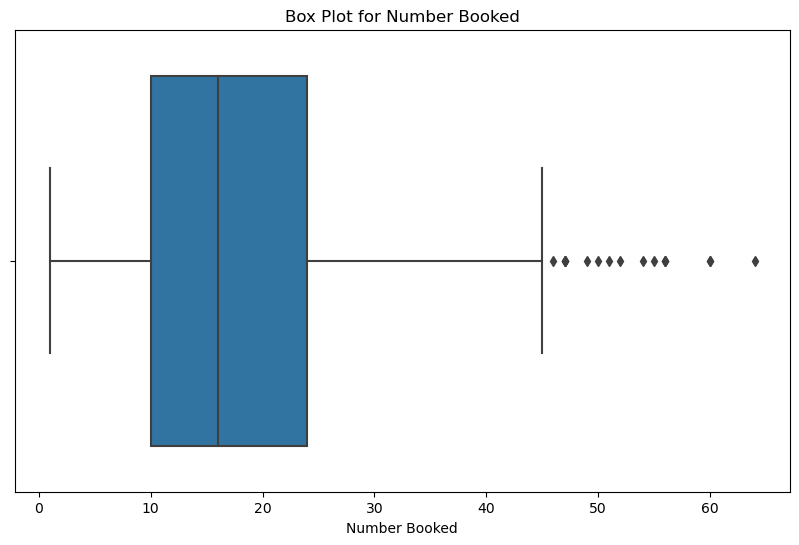

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number Booked', data=merged_df)
plt.title('Box Plot for Number Booked')
plt.xlabel('Number Booked')
plt.show()

In [17]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.count()

# Identify outliers in 'Price (INR)' and 'Number Booked'
outliers_price = identify_outliers(merged_df, 'Price (INR)')
outliers_booked = identify_outliers(merged_df, 'Number Booked')

print(f"Outliers in Price (INR): \n{outliers_price}\n")
print(f"Outliers in Number Booked: \n{outliers_booked}\n")


Outliers in Price (INR): 
ActivitySiteID                         0
Class Name                             0
Class Timings                          0
BookingEndDateTime (Day/Month/Year)    0
BookingStartTime                       0
MaxBookees                             0
Number Booked                          0
Price (INR)                            0
dtype: int64

Outliers in Number Booked: 
ActivitySiteID                         17
Class Name                             17
Class Timings                          17
BookingEndDateTime (Day/Month/Year)    17
BookingStartTime                       17
MaxBookees                             17
Number Booked                          17
Price (INR)                            17
dtype: int64

Outliers in Max bookees: 
ActivitySiteID                         550
Class Name                             550
Class Timings                          550
BookingEndDateTime (Day/Month/Year)    550
BookingStartTime                       550
MaxBookees   

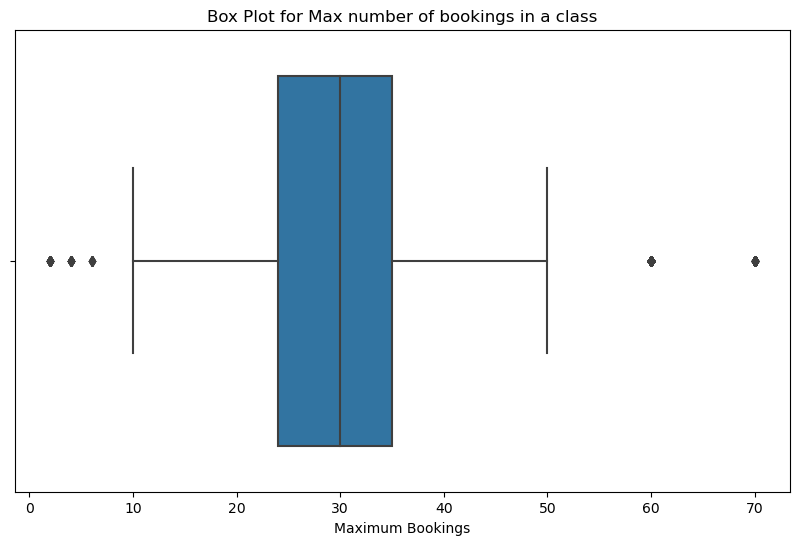

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaxBookees', data=merged_df)
plt.title('Box Plot for Max number of bookings in a class')
plt.xlabel('Maximum Bookings')
plt.show()

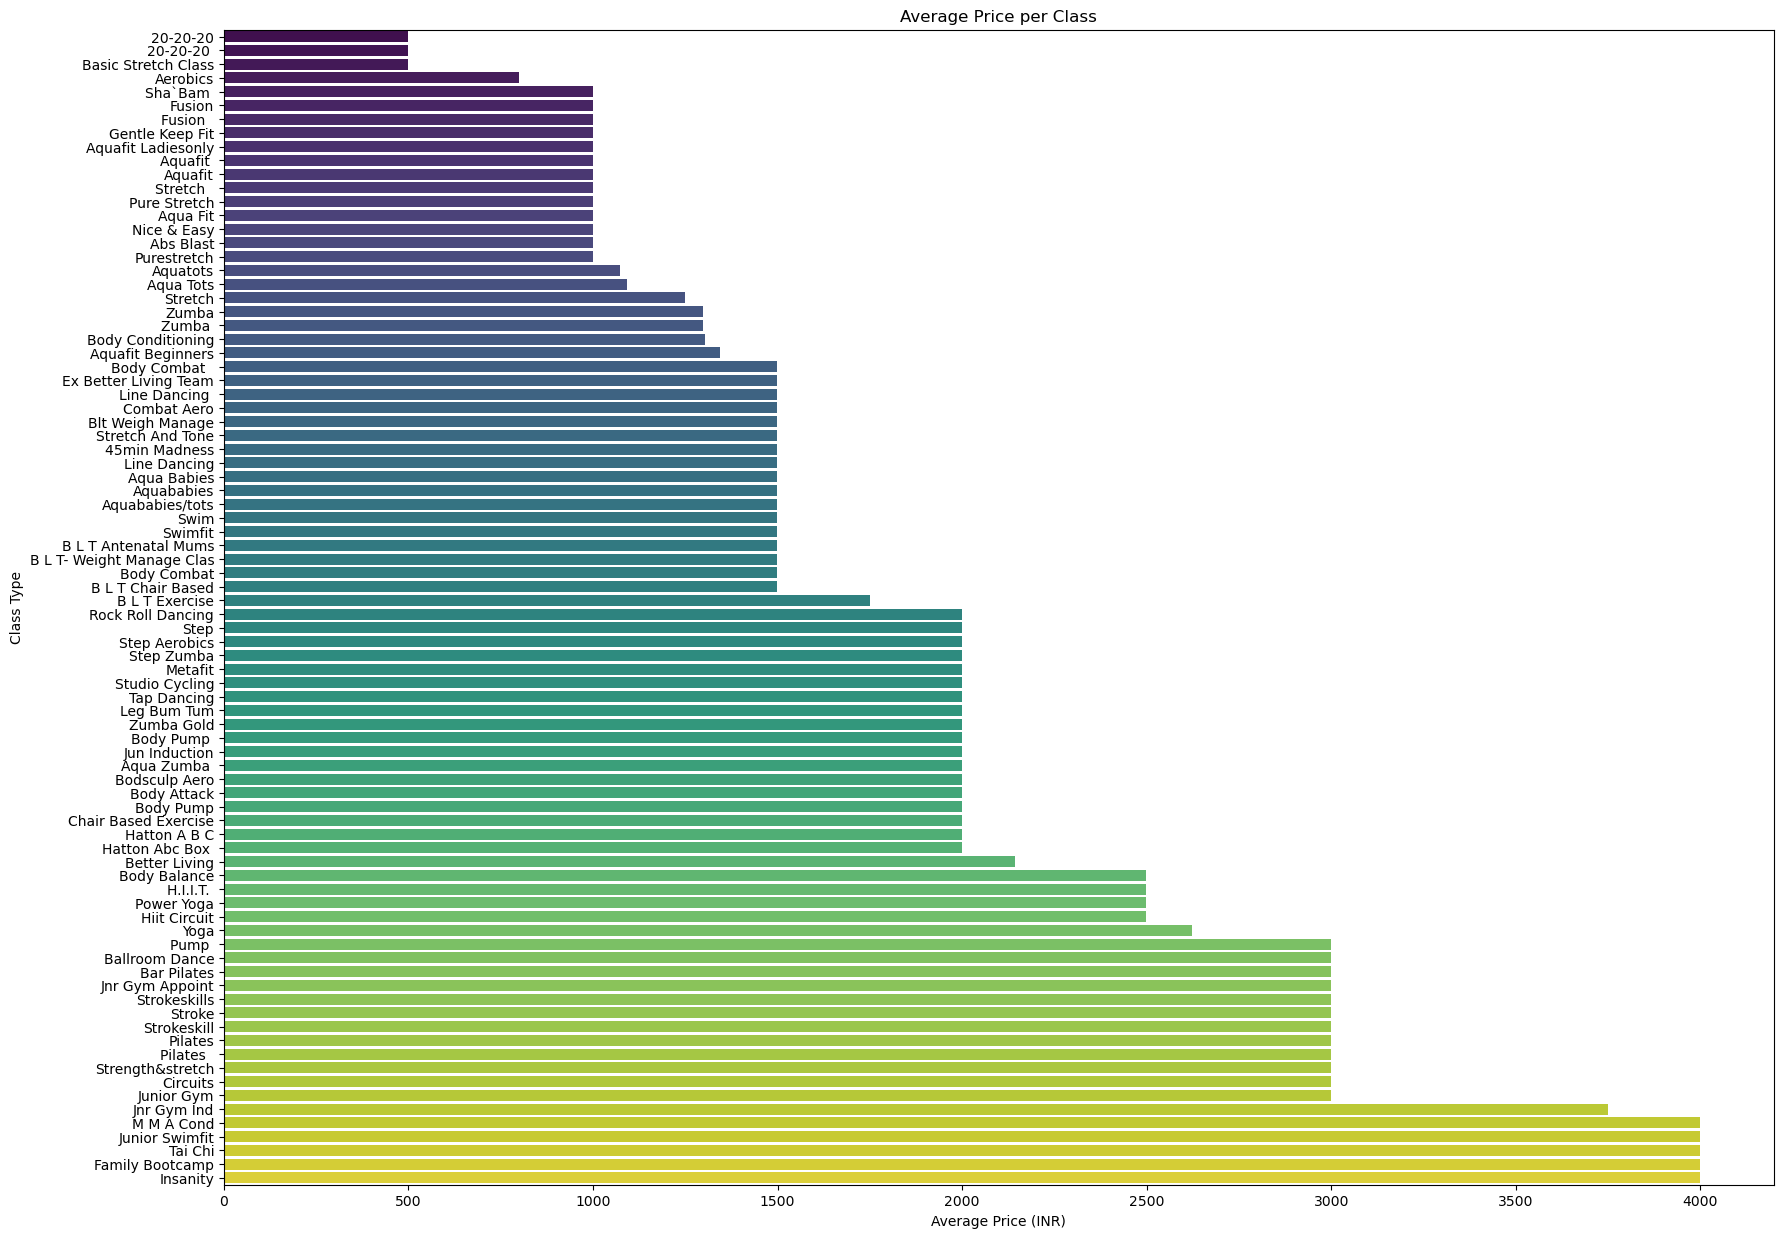

In [7]:
average_price_per_class = merged_df.groupby('Class Name')['Price (INR)'].mean().sort_values()
plt.figure(figsize=(20,15))
sns.barplot(x=average_price_per_class.values, y=average_price_per_class.index, palette='viridis')
plt.title('Average Price per Class')
plt.xlabel('Average Price (INR)')
plt.ylabel('Class Type')
plt.show()
